In [11]:
import pandas as pd, sqlite3

# Ex02. Bar

## 1. Подключение к базе данных

In [12]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

## 2. График коммитов студентов по времени суток

In [13]:
daytimes = pd.read_sql('''
                       SELECT strftime('%Y-%m-%d', timestamp) date, CAST(strftime('%H', timestamp) AS INTEGER) hour 
                       FROM checker
                       where uid LIKE 'user_%'
            ''', conn)

bins = [0, 3, 9, 16, 23]
labels = ['night', 'morning', 'afternoon', 'evening']
daytimes['daytime'] = pd.cut(daytimes['hour'], bins=bins, labels=labels)

In [14]:
daytimes_count = pd.DataFrame(daytimes[['date', 'daytime']].value_counts())
table = daytimes_count.pivot_table(values='count', index='date', columns='daytime', fill_value=0, observed=False)

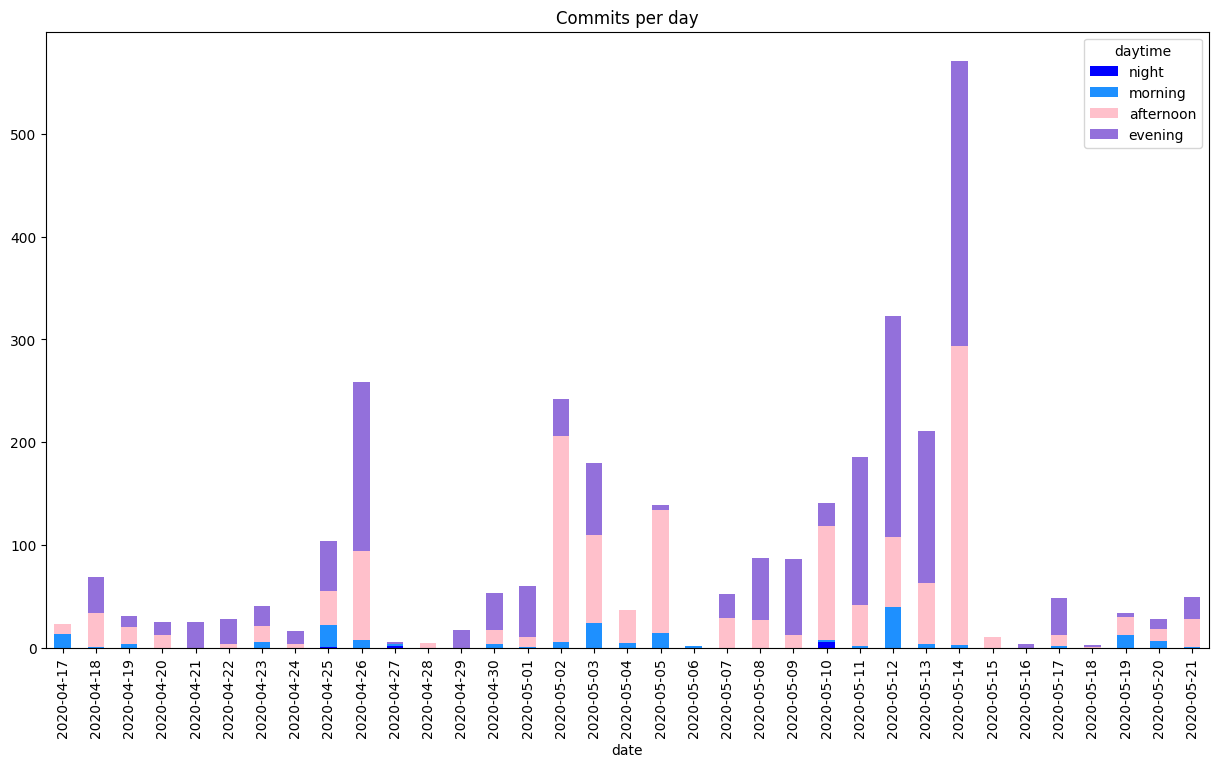

In [15]:
table.plot(kind='bar', stacked=True, figsize=(15, 8), color=['blue', 'dodgerblue', 'pink', 'mediumpurple'], title='Commits per day');

**Когда наши пользователи обычно посещают лаборатории: ночью, утром, днём или вечером?**\
Ответ: *днём, вечером*

**В какой день: наибольшее количество коммитов и в то же время, количество коммитов вечером больше, чем днем?**\
Ответ: *2020-05-12*

In [16]:
table.shape

(35, 4)

## 3. Закрытие соединения

In [17]:
conn.close()